In [139]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

try:
    from sklearn.metrics import calinski_harabasz_score
except ImportError:
    from sklearn.metrics import calinski_harabasz_score

import warnings
warnings.filterwarnings("ignore")

sns.set()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

INFILE = "C:\\Users\\Owner\\Documents\\Northwestern\\Intro_MachineLearning\\Assignment1\\DataSet\\HMEQ_Loss.csv"

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"

df = pd.read_csv( INFILE )
df_org = df.copy()


dt = df.dtypes

In [140]:
print( df.head().T )
print('-----------------------')
print( df.dtypes )

                       0        1        2     3        4
TARGET_BAD_FLAG        1        1        1     1        0
TARGET_LOSS_AMT      641     1109      767  1425      NaN
LOAN                1100     1300     1500  1500     1700
MORTDUE            25860    70053    13500   NaN    97800
VALUE              39025    68400    16700   NaN   112000
REASON           HomeImp  HomeImp  HomeImp   NaN  HomeImp
JOB                Other    Other    Other   NaN   Office
YOJ                 10.5        7        4   NaN        3
DEROG                  0        0        0   NaN        0
DELINQ                 0        2        0   NaN        0
CLAGE            94.3667  121.833  149.467   NaN  93.3333
NINQ                   1        0        1   NaN        0
CLNO                   9       14       10   NaN       14
DEBTINC              NaN      NaN      NaN   NaN      NaN
-----------------------
TARGET_BAD_FLAG      int64
TARGET_LOSS_AMT    float64
LOAN                 int64
MORTDUE            float6

In [141]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET_BAD_FLAG,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
TARGET_LOSS_AMT,1189.0,13414.576955,10839.455965,224.000000,5639.000000,11003.000000,17634.000000,78987.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000


In [142]:
x = df.describe().T

objList = []
numList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )

print(" OBJECTS ")
print(" ------- ")
for i in objList :
    print(i)
##
print("  ")
print(" NUMBERS ")
print(" ------- ")
for i in numList :
    print(i)

 OBJECTS 
 ------- 
REASON
JOB
  
 NUMBERS 
 ------- 
LOAN
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC


In [143]:
"""
FILL IN MISSING WITH THE CATEGORY "MISSING"
"""
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby( NAME )
    df = df.drop( i, axis=1 )


dt = df.dtypes
objList = []
for i in dt.index :
    print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )

 here is i ..... TARGET_BAD_FLAG  ..... and here is the type int64
 here is i ..... TARGET_LOSS_AMT  ..... and here is the type float64
 here is i ..... LOAN  ..... and here is the type int64
 here is i ..... MORTDUE  ..... and here is the type float64
 here is i ..... VALUE  ..... and here is the type float64
 here is i ..... YOJ  ..... and here is the type float64
 here is i ..... DEROG  ..... and here is the type float64
 here is i ..... DELINQ  ..... and here is the type float64
 here is i ..... CLAGE  ..... and here is the type float64
 here is i ..... NINQ  ..... and here is the type float64
 here is i ..... CLNO  ..... and here is the type float64
 here is i ..... DEBTINC  ..... and here is the type float64
 here is i ..... IMP_REASON  ..... and here is the type object
 here is i ..... IMP_JOB  ..... and here is the type object


In [144]:
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1,1,1,1,0
TARGET_LOSS_AMT,641,1109,767,1425,NaN
LOAN,1100,1300,1500,1500,1700
MORTDUE,25860,70053,13500,NaN,97800
VALUE,39025,68400,16700,NaN,112000
YOJ,10.5,7,4,NaN,3
DEROG,0,0,0,NaN,0
DELINQ,0,2,0,NaN,0
CLAGE,94.3667,121.833,149.467,NaN,93.3333
NINQ,1,0,1,NaN,0


In [145]:
g = df.groupby("IMP_JOB")
i = "MORTDUE"
print( g[i].median() )

IMP_JOB
MISSING    58936.0
Mgr        76600.0
Office     62970.5
Other      54834.0
ProfExe    82802.5
Sales      71800.0
Self       88465.0
Name: MORTDUE, dtype: float64


In [146]:
g = df.groupby("IMP_JOB")
i = "VALUE"
print( g[i].median() )

IMP_JOB
MISSING     78227.0
Mgr        101258.0
Office      89094.5
Other       76599.5
ProfExe    110007.0
Sales       84473.5
Self       130631.0
Name: VALUE, dtype: float64


In [147]:
g = df.groupby("IMP_REASON")
i = "NINQ"
print( g[i].median() )

IMP_REASON
DebtCon    1.0
HomeImp    0.0
MISSING    0.0
Name: NINQ, dtype: float64


In [148]:
i = "MORTDUE"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["MISSING"]), IMP ] = 58936
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Mgr"]), IMP ] = 76600
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Office"]), IMP ] = 62970
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Other"]), IMP ] = 54834
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["ProfExe"]), IMP ] = 82802
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Sales"]), IMP ] = 71800
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Self"]), IMP ] = 88465
df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)

i = "VALUE"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["MISSING"]), IMP ] = 78227
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Mgr"]), IMP ] = 101258
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Office"]), IMP ] = 89094
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Other"]), IMP ] = 76599
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["ProfExe"]), IMP ] = 110007
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Sales"]), IMP ] = 84473
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Self"]), IMP ] = 130631
df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)

i = "NINQ"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["DebtCon"]), IMP ] = 1
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["HomeImp"]), IMP ] = 0
df.loc[ df[IMP].isna() & df["IMP_REASON"].isin(["MISSING"]), IMP ] = 0

df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)



for i in numList :
    if df[i].isna().sum() == 0 : continue
    FLAG = "M_" + i
    IMP = "IMP_" + i
    #print(i)
    #print( df[i].isna().sum() )
    #print( FLAG )
    #print( IMP )
    #print(" ------- ")
    df[ FLAG ] = df[i].isna() + 0
    df[ IMP ] = df[ i ]
    df.loc[ df[IMP].isna(), IMP ] = df[i].median()
    df = df.drop( i, axis=1 )


for i in objList:
    df = df.drop( i, axis=1 )


df.head().T


,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.000000,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,NaN
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
M_MORTDUE,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_MORTDUE,25860.000000,70053.000000,13500.000000,58936.000000,97800.000000
M_VALUE,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_VALUE,39025.000000,68400.000000,16700.000000,78227.000000,112000.000000
M_NINQ,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_NINQ,1.000000,0.000000,1.000000,0.000000,0.000000
M_YOJ,0.000000,0.000000,0.000000,1.000000,0.000000


In [149]:
"""
Remove Outliers
"""

dt = df.dtypes
numList = []
for i in dt.index :
    #print(i, dt[i])
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["float64","int64"]) : numList.append( i )

for i in numList :
    theMean = df[i].mean()
    theSD = df[i].std()
    theMax = df[i].max()
    theCutoff = round( theMean + 3*theSD )
    if theMax < theCutoff : continue
    FLAG = "O_" + i
    TRUNC = "TRUNC_" + i
    df[ FLAG ] = ( df[i] > theCutoff )+ 0
    df[ TRUNC ] = df[ i ]
    df.loc[ df[TRUNC] > theCutoff, TRUNC ] = theCutoff
    df = df.drop( i, axis=1 )


In [150]:
df.head().T


,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.000000,0.000000
TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,NaN
M_MORTDUE,0.000000,0.000000,0.000000,1.000000,0.000000
M_VALUE,0.000000,0.000000,0.000000,1.000000,0.000000
M_NINQ,0.000000,0.000000,0.000000,1.000000,0.000000
M_YOJ,0.000000,0.000000,0.000000,1.000000,0.000000
M_DEROG,0.000000,0.000000,0.000000,1.000000,0.000000
M_DELINQ,0.000000,0.000000,0.000000,1.000000,0.000000
M_CLAGE,0.000000,0.000000,0.000000,1.000000,0.000000
M_CLNO,0.000000,0.000000,0.000000,1.000000,0.000000


In [151]:
#Remove the Target Variables, Missing Flag fields and the Categorical Flag Fields

df_newTest = df.loc[:, ~df.columns.str.startswith('M_')]
df_newTest = df_newTest.loc[:, ~df_newTest.columns.str.startswith('O_')]
df_newTest = df_newTest.drop( ['TARGET_BAD_FLAG','TARGET_LOSS_AMT'], axis=1 )


In [152]:
df_newTest.describe().T

,count,mean,std,min,25%,50%,75%,max
TRUNC_LOAN,5960.0,18362.256711,10148.976515,1100.000000,11100.000000,16300.000000,23300.000000,52230.0
TRUNC_IMP_MORTDUE,5960.0,71761.769664,39210.774247,2063.000000,48139.000000,62970.000000,88465.000000,200758.0
TRUNC_IMP_VALUE,5960.0,100476.950846,50461.111406,8000.000000,66489.500000,89094.000000,119144.750000,272273.0
TRUNC_IMP_NINQ,5960.0,1.072315,1.426844,0.000000,0.000000,1.000000,2.000000,6.0
TRUNC_IMP_YOJ,5960.0,8.741737,7.208863,0.000000,3.000000,7.000000,12.000000,31.0
TRUNC_IMP_DEROG,5960.0,0.192114,0.582947,0.000000,0.000000,0.000000,0.000000,3.0
TRUNC_IMP_DELINQ,5960.0,0.371309,0.886332,0.000000,0.000000,0.000000,0.000000,4.0
TRUNC_IMP_CLAGE,5960.0,178.519248,78.853277,0.000000,117.371430,173.466667,227.143058,430.0
TRUNC_IMP_CLNO,5960.0,21.200671,9.783956,0.000000,15.000000,20.000000,26.000000,51.0
TRUNC_IMP_DEBTINC,5960.0,33.877119,6.649744,0.524499,30.763159,34.818262,37.949892,57.0


In [153]:
varNames = df_newTest.columns

#print( X.head() )
#print( X.describe() )
#print( "\n\n")

##
##### TRANSFROM
##
theScaler = MinMaxScaler()
##theScaler = StandardScaler()
theScaler.fit( df_newTest )

X_TRN = theScaler.transform( df_newTest )
X_TRN = pd.DataFrame( X_TRN )
#print( X_TRN.head() )
#print( "\n\n")


varNames_trn = []
for i in varNames :
    newName = "trn_" + i
    varNames_trn.append( newName )
#print( varNames_trn )
#print( "\n\n")

X_TRN.columns = varNames_trn
#print( X_TRN.head() )
#print( "\n\n")

#print( X_TRN.describe() )
#print( "\n\n")

In [154]:
K_LIST = []
I_LIST = []
S_LIST = []
C_LIST = []

#change the random state # i.e the starting point and run a couple times to see if the clusters 
#are consistent/make sesnse
for K in range(3,12) :
    km = KMeans( n_clusters=K, random_state = 1 )
    km.fit( X_TRN )
    #Y = km.predict( X_TRN )
    K_LIST.append( K )
    I_LIST.append( km.inertia_ )
    S_LIST.append( silhouette_score(X_TRN,km.labels_) )
    C_LIST.append( calinski_harabasz_score(X_TRN,km.labels_) )

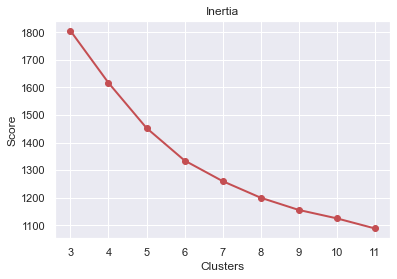

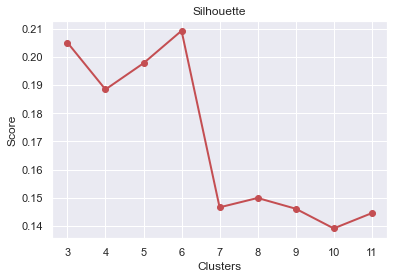

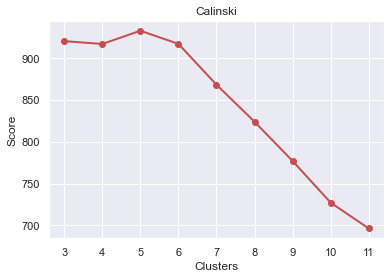





K =  6
   TARGET_BAD_FLAG  TARGET_LOSS_AMT  M_MORTDUE  M_VALUE  M_NINQ  M_YOJ  \
0                1            641.0          0        0       0      0   
1                1           1109.0          0        0       0      0   
2                1            767.0          0        0       0      0   
3                1           1425.0          1        1       1      1   
4                0              NaN          0        0       0      0   

   M_DEROG  M_DELINQ  M_CLAGE  M_CLNO  M_DEBTINC  O_LOAN  TRUNC_LOAN  \
0        0         0        0       0          1       0        1100   
1        0         0        0       0          1       0        1300   
2        0         0        0       0          1       0        1500   
3        1         1        1       1          1       0        1500   
4        0         0        0       0          1       0        1700   

   O_IMP_MORTDUE  TRUNC_IMP_MORTDUE  O_IMP_VALUE  TRUNC_IMP_VALUE  O_IMP_NINQ  \
0              0            25

In [161]:
def drawElbow( K, SCORE, LABEL ) :
    plt.plot( K , SCORE, 'ro-', linewidth=2)
    plt.title(LABEL)
    plt.xlabel('Clusters')
    plt.ylabel('Score')
    plt.show()


drawElbow( K_LIST, I_LIST, "Inertia" )
drawElbow( K_LIST, S_LIST, "Silhouette" )
drawElbow( K_LIST, C_LIST, "Calinski" )

def clusterData( DATA, TRN_DATA, K, TARGET ) :
    print("\n\n\n")
    print("K = ",K)
    #print( X_TRN.describe() )
    print("=======")
    km = KMeans( n_clusters=K, random_state = 2 )
    km.fit( TRN_DATA )
    Y = km.predict( TRN_DATA )
    DATA["CLUSTER"] = Y
    print( DATA.head() )

    G = DATA.groupby("CLUSTER")
    print( G.mean() )
    print("\n\n\n")
    print( G[ TARGET ].value_counts() )


#clusterData( df, X_TRN, 3, TARGET_F )
#clusterData( df, X_TRN, 4, TARGET_F )
#clusterData( df, X_TRN, 5, TARGET_F )
clusterData( df, X_TRN, 6, TARGET_F )